In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Conv1D, LSTM, Dense, Flatten


In [3]:
data_path = 'WPC.csv' 
df = pd.read_csv(data_path)

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df['DateNumeric'] = df['Date'].map(lambda x: x.toordinal()) 

feature_columns = [col for col in df.columns if col not in ['Close', 'Adjusted Close', 'Date']] 

# Normalize feature columns manually (min-max scaling)
def manual_min_max_scaling(data):
    normalized_data = (data - data.min()) / (data.max() - data.min())
    return normalized_data

normalized_features = df[feature_columns].apply(manual_min_max_scaling)

# Normalize target columns ('Close' and 'Adjusted Close') manually
normalized_close = manual_min_max_scaling(df['Close'])
normalized_adj_close = manual_min_max_scaling(df['Adjusted Close'])

# Combine scaled targets into a single array
normalized_targets = np.column_stack((normalized_close, normalized_adj_close)) 

print("Feature Columns:", feature_columns)
print("Normalized Features Shape:", normalized_features.shape)
print("Normalized Targets Shape:", normalized_targets.shape)

Feature Columns: ['Low', 'Open', 'Volume', 'High', 'DateNumeric']
Normalized Features Shape: (6266, 5)
Normalized Targets Shape: (6266, 2)


In [4]:
# Define a function to create sequences for features and targets
def create_feature_target_sequences(features, targets, window_size):
    input_sequences = []
    output_sequences = []
    
    # Ensure features and targets are NumPy arrays
    features = np.array(features)
    targets = np.array(targets)
    
    for i in range(window_size, len(features)):
        input_sequences.append(features[i - window_size:i, :])  # Create feature sequences
        output_sequences.append(targets[i, :])  # Create target sequences
        
    return np.array(input_sequences), np.array(output_sequences)

# Time steps to experiment with
time_steps_list = [30, 50, 20]

# Dictionary to store data for each time step
data_splits = {}

for time_steps in time_steps_list:
    print(f"\nProcessing for time steps: {time_steps}")
    
    # Check the shapes of normalized features and targets
    print(f"Normalized Features Shape: {normalized_features.shape}")
    print(f"Normalized Targets Shape: {normalized_targets.shape}")
    
    # Create input and output sequences for the model
    X_data, y_data = create_feature_target_sequences(normalized_features, normalized_targets, time_steps)
    
    # Debug prints for generated sequences
    print(f"Generated input sequences shape: {X_data.shape}")
    print(f"Generated target sequences shape: {y_data.shape}")

    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.3, shuffle=False)
    X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

    # Store the data splits for the current time steps
    data_splits[time_steps] = {
        "X_train": X_train, "y_train": y_train,
        "X_validation": X_validation, "y_validation": y_validation,
        "X_test": X_test, "y_test": y_test
    }

    # Print the shapes of the data splits for verification
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_validation shape: {X_validation.shape}, y_validation shape: {y_validation.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



Processing for time steps: 30
Normalized Features Shape: (6266, 5)
Normalized Targets Shape: (6266, 2)
Generated input sequences shape: (6236, 30, 5)
Generated target sequences shape: (6236, 2)
X_train shape: (4365, 30, 5), y_train shape: (4365, 2)
X_validation shape: (935, 30, 5), y_validation shape: (935, 2)
X_test shape: (936, 30, 5), y_test shape: (936, 2)

Processing for time steps: 50
Normalized Features Shape: (6266, 5)
Normalized Targets Shape: (6266, 2)
Generated input sequences shape: (6216, 50, 5)
Generated target sequences shape: (6216, 2)
X_train shape: (4351, 50, 5), y_train shape: (4351, 2)
X_validation shape: (932, 50, 5), y_validation shape: (932, 2)
X_test shape: (933, 50, 5), y_test shape: (933, 2)

Processing for time steps: 20
Normalized Features Shape: (6266, 5)
Normalized Targets Shape: (6266, 2)
Generated input sequences shape: (6246, 20, 5)
Generated target sequences shape: (6246, 2)
X_train shape: (4372, 20, 5), y_train shape: (4372, 2)
X_validation shape: (9

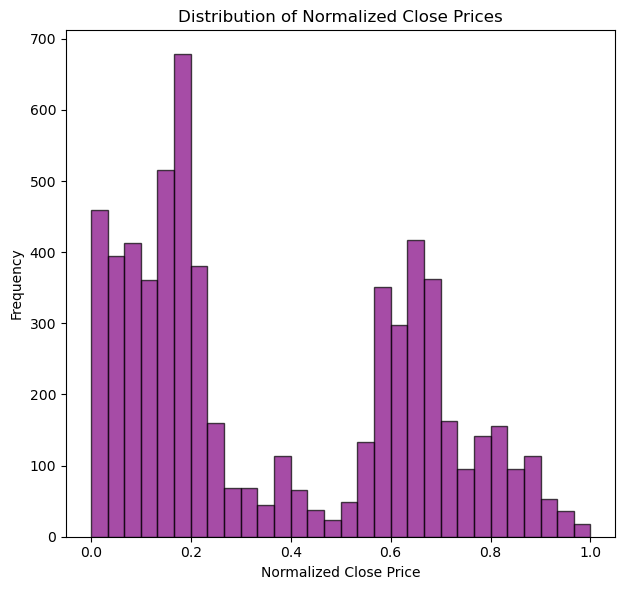

In [5]:
import matplotlib.pyplot as plt

# Plot distributions for normalized features and targets
plt.figure(figsize=(12, 6))

# Plot normalized target distributions ('Close')
plt.subplot(1, 2, 2)
plt.hist(normalized_targets[:, 0], bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribution of Normalized Close Prices')
plt.xlabel('Normalized Close Price')
plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()




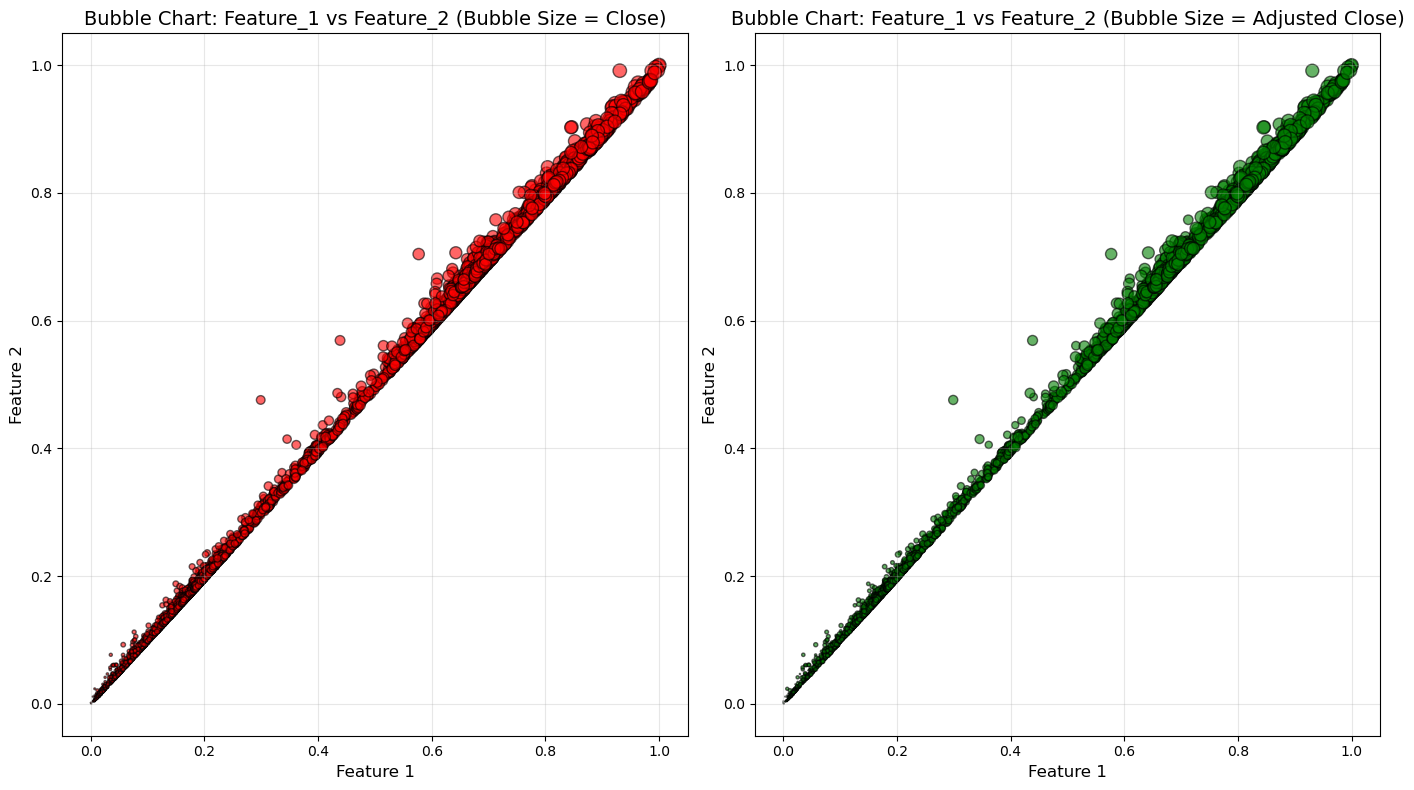

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure normalized_features is a DataFrame
if isinstance(normalized_features, np.ndarray):
    normalized_features = pd.DataFrame(
        normalized_features, 
        columns=[f"Feature_{i+1}" for i in range(normalized_features.shape[1])]
    )
    print("Converted normalized_features to a DataFrame.")

# Add the actual target columns `Close` and `Adjusted Close` (replace these with your actual target data)
normalized_features['Close'] = normalized_targets[:, 0]  # Assuming Close is the first column of targets
normalized_features['Adjusted Close'] = normalized_targets[:, 1]  # Assuming Adjusted Close is the second column

# Select features for the Bubble Chart
x_feature = normalized_features.iloc[:, 0]  # Example: Feature_1 for X-Axis
y_feature = normalized_features.iloc[:, 1]  # Example: Feature_2 for Y-Axis
bubble_size_close = normalized_features['Close'] * 100  # Scale 'Close' for bubble size
bubble_size_adj_close = normalized_features['Adjusted Close'] * 100  # Scale 'Adjusted Close' for bubble size

# Plot the Bubble Charts
plt.figure(figsize=(14, 8))

# Bubble Chart for `Close`
plt.subplot(1, 2, 1)
plt.scatter(
    x_feature, 
    y_feature, 
    s=bubble_size_close, 
    alpha=0.6, 
    color='red', 
    edgecolors='black'
)
plt.title("Bubble Chart: Feature_1 vs Feature_2 (Bubble Size = Close)", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.3)

# Bubble Chart for `Adjusted Close`
plt.subplot(1, 2, 2)
plt.scatter(
    x_feature, 
    y_feature, 
    s=bubble_size_adj_close, 
    alpha=0.6, 
    color='green', 
    edgecolors='black'
)
plt.title("Bubble Chart: Feature_1 vs Feature_2 (Bubble Size = Adjusted Close)", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.3)

# Adjust layout and show
plt.tight_layout()
plt.show()






Training Conv1D model for time steps: 30
Epoch 1/20
137/137 [==============================] - 2s 7ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 2/20
137/137 [==============================] - 1s 5ms/step - loss: 2.0812e-04 - mse: 2.0812e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3/20
137/137 [==============================] - 0s 3ms/step - loss: 1.8702e-04 - mse: 1.8702e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4/20
137/137 [==============================] - 0s 3ms/step - loss: 1.4870e-04 - mse: 1.4870e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 5/20
137/137 [==============================] - 0s 3ms/step - loss: 2.6954e-04 - mse: 2.6954e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 6/20
137/137 [==============================] - 0s 3ms/step - loss: 1.3314e-04 - mse: 1.3314e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 7/20
137/137 [==============================] - 0s 3ms/step - loss: 1.1537e-04 - mse: 1.1537e-04 - val_loss: 0.0027 - va

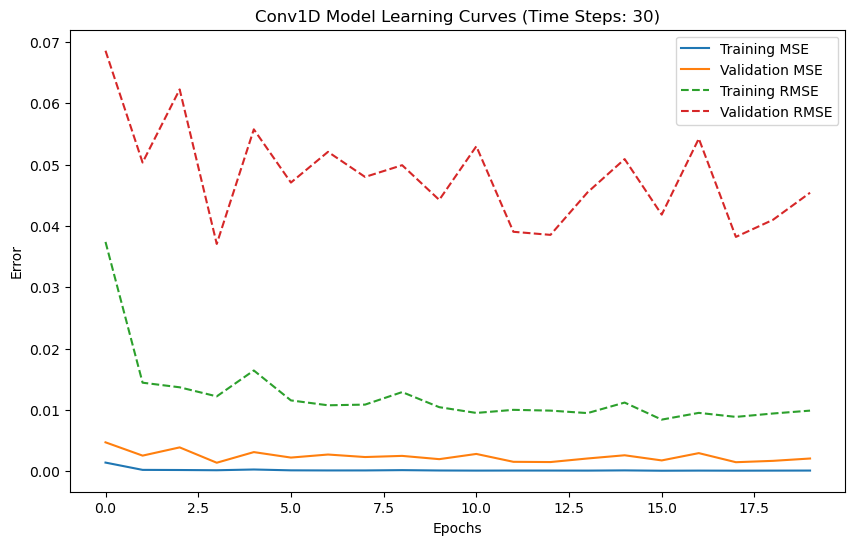

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Time Step: 30
time_steps = 30
print(f"\nTraining Conv1D model for time steps: {time_steps}")

# Get the data splits for the current time step
X_train = data_splits[time_steps]["X_train"]
y_train = data_splits[time_steps]["y_train"]
X_validation = data_splits[time_steps]["X_validation"]
y_validation = data_splits[time_steps]["y_validation"]
X_test = data_splits[time_steps]["X_test"]
y_test = data_splits[time_steps]["y_test"]

# Define the Conv1D Model
conv1d_model_30 = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(y_train.shape[1])  # Output layer
])

# Compile the Model
conv1d_model_30.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the Model
history_30 = conv1d_model_30.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate the Model
test_loss_30, test_mse_30 = conv1d_model_30.evaluate(X_test, y_test, verbose=1)
print(f"Time Steps {time_steps} - Conv1D Model Validation Loss (MSE): {test_loss_30}")

# Plot Learning Curve for MSE and RMSE
plt.figure(figsize=(10, 6))
# MSE Learning Curve
plt.plot(history_30.history['loss'], label='Training MSE')
plt.plot(history_30.history['val_loss'], label='Validation MSE')
# RMSE Learning Curve (square root of MSE)
plt.plot(
    [loss ** 0.5 for loss in history_30.history['loss']], 
    label='Training RMSE', linestyle='--'
)
plt.plot(
    [val_loss ** 0.5 for val_loss in history_30.history['val_loss']], 
    label='Validation RMSE', linestyle='--'
)
plt.title(f"Conv1D Model Learning Curves (Time Steps: {time_steps})")
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()





Training Conv1D model for time steps: 50
Epoch 1/20
136/136 [==============================] - 2s 8ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2/20
136/136 [==============================] - 1s 7ms/step - loss: 2.6882e-04 - mse: 2.6882e-04 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3/20
136/136 [==============================] - 1s 4ms/step - loss: 2.0387e-04 - mse: 2.0387e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4/20
136/136 [==============================] - 1s 6ms/step - loss: 1.6774e-04 - mse: 1.6774e-04 - val_loss: 8.7419e-04 - val_mse: 8.7419e-04
Epoch 5/20
136/136 [==============================] - 1s 7ms/step - loss: 1.7169e-04 - mse: 1.7169e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 6/20
136/136 [==============================] - 1s 5ms/step - loss: 1.6243e-04 - mse: 1.6243e-04 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 7/20
136/136 [==============================] - 1s 5ms/step - loss: 2.3000e-04 - mse: 2.3000e-04 - val_loss: 0.0

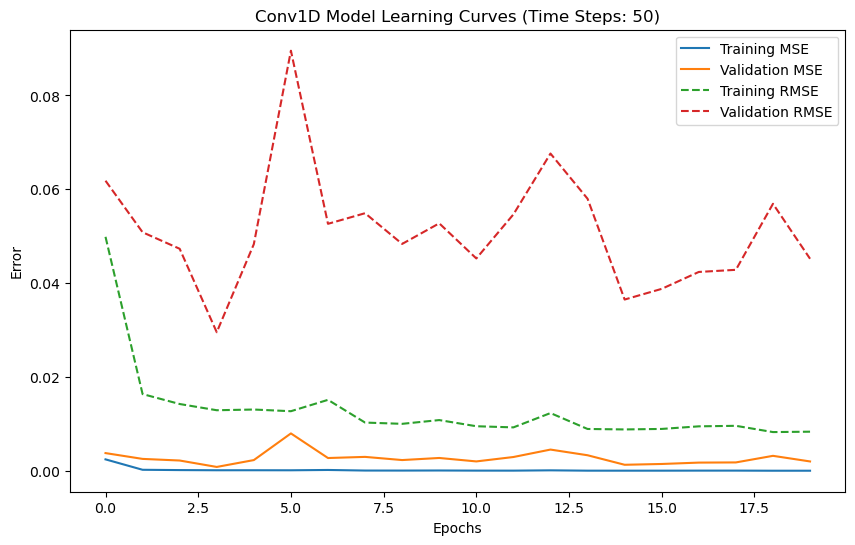

In [12]:
# Time Step: 50
time_steps = 50
print(f"\nTraining Conv1D model for time steps: {time_steps}")

# Get the data splits for the current time step
X_train = data_splits[time_steps]["X_train"]
y_train = data_splits[time_steps]["y_train"]
X_validation = data_splits[time_steps]["X_validation"]
y_validation = data_splits[time_steps]["y_validation"]
X_test = data_splits[time_steps]["X_test"]
y_test = data_splits[time_steps]["y_test"]

# Define the Conv1D Model
conv1d_model_50 = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(y_train.shape[1])  # Output layer
])

# Compile the Model
conv1d_model_50.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the Model
history_50 = conv1d_model_50.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate the Model
test_loss_50, test_mse_50 = conv1d_model_50.evaluate(X_test, y_test, verbose=1)
print(f"Time Steps {time_steps} - Conv1D Model Validation Loss (MSE): {test_loss_50}")

# Plot Learning Curve for MSE and RMSE
plt.figure(figsize=(10, 6))
# MSE Learning Curve
plt.plot(history_50.history['loss'], label='Training MSE')
plt.plot(history_50.history['val_loss'], label='Validation MSE')
# RMSE Learning Curve (square root of MSE)
plt.plot(
    [loss ** 0.5 for loss in history_50.history['loss']], 
    label='Training RMSE', linestyle='--'
)
plt.plot(
    [val_loss ** 0.5 for val_loss in history_50.history['val_loss']], 
    label='Validation RMSE', linestyle='--'
)
plt.title(f"Conv1D Model Learning Curves (Time Steps: {time_steps})")
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()



Training Conv1D model for time steps: 20
Epoch 1/20
137/137 [==============================] - 1s 4ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 2/20
137/137 [==============================] - 0s 3ms/step - loss: 1.9969e-04 - mse: 1.9969e-04 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3/20
137/137 [==============================] - 0s 2ms/step - loss: 1.6004e-04 - mse: 1.6004e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4/20
137/137 [==============================] - 0s 2ms/step - loss: 1.3374e-04 - mse: 1.3374e-04 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 5/20
137/137 [==============================] - 0s 2ms/step - loss: 1.1681e-04 - mse: 1.1681e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 6/20
137/137 [==============================] - 0s 3ms/step - loss: 1.1037e-04 - mse: 1.1037e-04 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 7/20
137/137 [==============================] - 0s 2ms/step - loss: 1.1564e-04 - mse: 1.1564e-04 - val_loss: 0.0021 - va

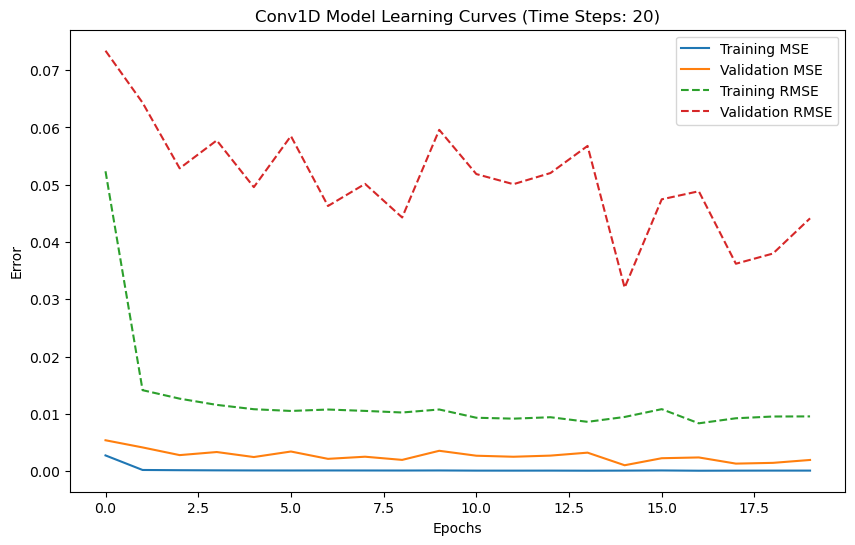

In [13]:
# Time Step: 20
time_steps = 20
print(f"\nTraining Conv1D model for time steps: {time_steps}")

# Get the data splits for the current time step
X_train = data_splits[time_steps]["X_train"]
y_train = data_splits[time_steps]["y_train"]
X_validation = data_splits[time_steps]["X_validation"]
y_validation = data_splits[time_steps]["y_validation"]
X_test = data_splits[time_steps]["X_test"]
y_test = data_splits[time_steps]["y_test"]

# Define the Conv1D Model
conv1d_model_20 = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(y_train.shape[1])  # Output layer
])

# Compile the Model
conv1d_model_20.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the Model
history_20 = conv1d_model_20.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate the Model
test_loss_20, test_mse_20 = conv1d_model_20.evaluate(X_test, y_test, verbose=1)
print(f"Time Steps {time_steps} - Conv1D Model Validation Loss (MSE): {test_loss_20}")

# Plot Learning Curve for MSE and RMSE
plt.figure(figsize=(10, 6))
# MSE Learning Curve
plt.plot(history_20.history['loss'], label='Training MSE')
plt.plot(history_20.history['val_loss'], label='Validation MSE')
# RMSE Learning Curve (square root of MSE)
plt.plot(
    [loss ** 0.5 for loss in history_20.history['loss']], 
    label='Training RMSE', linestyle='--'
)
plt.plot(
    [val_loss ** 0.5 for val_loss in history_20.history['val_loss']], 
    label='Validation RMSE', linestyle='--'
)
plt.title(f"Conv1D Model Learning Curves (Time Steps: {time_steps})")
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()


In [15]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Define and fit the scaler during preprocessing
target_scaler = MinMaxScaler()

# Assuming `df` and target columns were already processed earlier
normalized_targets = target_scaler.fit_transform(df[['Close', 'Adjusted Close']])

# Make predictions on the test set
y_pred_scaled = conv1d_model_20.predict(X_test)

# Unscale the predictions and true values using the scaler
y_test_unscaled = target_scaler.inverse_transform(y_test)  # Unscaled actual values
y_pred_unscaled = target_scaler.inverse_transform(y_pred_scaled)  # Unscaled predictions

# Compare scaled values
comparison_scaled_df = pd.DataFrame({
    "Actual Value (scaled)": y_test[:5, 0],  # Extract the first column of y_test
    "Predicted Value (scaled)": y_pred_scaled[:5, 0]  # Extract the first column of y_pred_scaled
})

# Print the scaled comparison
print("\nComparison of Scaled Values:")
print(comparison_scaled_df)

# Compare unscaled values
comparison_unscaled_df = pd.DataFrame({
    "Actual Value (unscaled)": y_test_unscaled[:5, 0],  # Extract the first column of y_test_unscaled
    "Predicted Value (unscaled)": y_pred_unscaled[:5, 0]  # Extract the first column of y_pred_unscaled
})

# Print the unscaled comparison
print("\nComparison of Unscaled Values:")
print(comparison_unscaled_df)


30/30 [==============================] - 0s 2ms/step

Comparison of Scaled Values:
   Actual Value (scaled)  Predicted Value (scaled)
0               0.809653                  0.810843
1               0.805277                  0.809969
2               0.805405                  0.806131
3               0.800129                  0.809173
4               0.808494                  0.810536

Comparison of Unscaled Values:
   Actual Value (unscaled)  Predicted Value (unscaled)
0                78.660004                   78.752533
1                78.320000                   78.684586
2                78.330002                   78.386353
3                77.919998                   78.622765
4                78.570000                   78.728668



Training LSTM model for time steps: 30
Epoch 1/20
137/137 [==============================] - 5s 15ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 2/20
137/137 [==============================] - 2s 12ms/step - loss: 1.2587e-04 - mse: 1.2587e-04 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3/20
137/137 [==============================] - 2s 15ms/step - loss: 1.2723e-04 - mse: 1.2723e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 4/20
137/137 [==============================] - 2s 16ms/step - loss: 1.0836e-04 - mse: 1.0836e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 5/20
137/137 [==============================] - 2s 17ms/step - loss: 9.7640e-05 - mse: 9.7640e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/20
137/137 [==============================] - 2s 13ms/step - loss: 8.8112e-05 - mse: 8.8112e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 7/20
137/137 [==============================] - 2s 14ms/step - loss: 7.9283e-05 - mse: 7.9283e-05 - val_loss: 0.0017

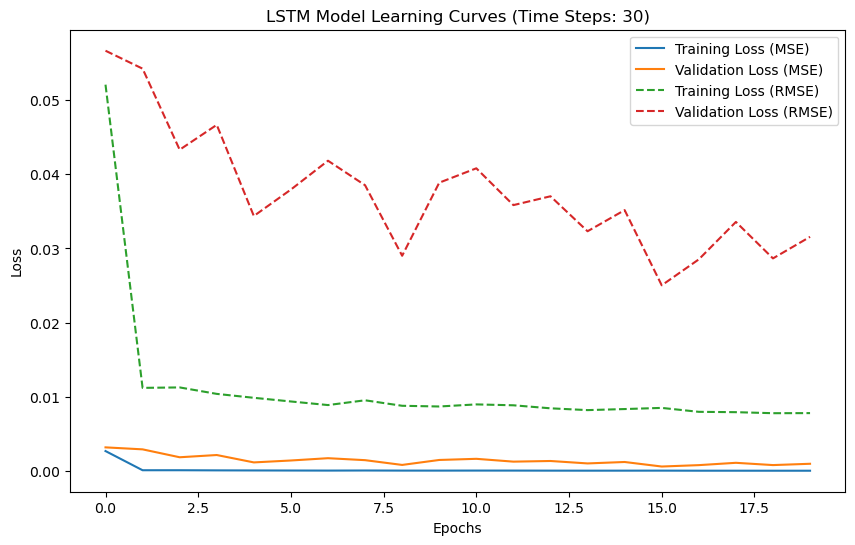

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Time Step: 30
time_steps = 30
print(f"\nTraining LSTM model for time steps: {time_steps}")

# Get the data splits for the current time step
X_train = data_splits[time_steps]["X_train"]
y_train = data_splits[time_steps]["y_train"]
X_validation = data_splits[time_steps]["X_validation"]
y_validation = data_splits[time_steps]["y_validation"]
X_test = data_splits[time_steps]["X_test"]
y_test = data_splits[time_steps]["y_test"]

# Define the LSTM Model
lstm_model_30 = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(50, activation='relu'),
    Dense(y_train.shape[1])  # Output layer
])

# Compile the Model
lstm_model_30.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the Model
history_30 = lstm_model_30.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate the Model
test_loss_30, test_mse_30 = lstm_model_30.evaluate(X_test, y_test, verbose=1)
test_rmse_30 = test_mse_30 ** 0.5
print(f"\nTime Steps {time_steps} - LSTM Model Performance:")
print(f"Mean Squared Error (MSE): {test_mse_30:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse_30:.4f}")

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(history_30.history['loss'], label='Training Loss (MSE)')
plt.plot(history_30.history['val_loss'], label='Validation Loss (MSE)')
plt.plot([loss ** 0.5 for loss in history_30.history['loss']], linestyle='--', label='Training Loss (RMSE)')
plt.plot([val_loss ** 0.5 for val_loss in history_30.history['val_loss']], linestyle='--', label='Validation Loss (RMSE)')
plt.title(f"LSTM Model Learning Curves (Time Steps: {time_steps})")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



Training LSTM model for time steps: 50
Epoch 1/20
136/136 [==============================] - 6s 19ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2/20
136/136 [==============================] - 2s 16ms/step - loss: 1.1317e-04 - mse: 1.1317e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3/20
136/136 [==============================] - 3s 24ms/step - loss: 9.5430e-05 - mse: 9.5430e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 4/20
136/136 [==============================] - 3s 19ms/step - loss: 1.0096e-04 - mse: 1.0096e-04 - val_loss: 7.9635e-04 - val_mse: 7.9635e-04
Epoch 5/20
136/136 [==============================] - 3s 21ms/step - loss: 8.6428e-05 - mse: 8.6428e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/20
136/136 [==============================] - 4s 30ms/step - loss: 8.8066e-05 - mse: 8.8066e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 7/20
136/136 [==============================] - 2s 16ms/step - loss: 8.3371e-05 - mse: 8.3371e-05 - val_loss

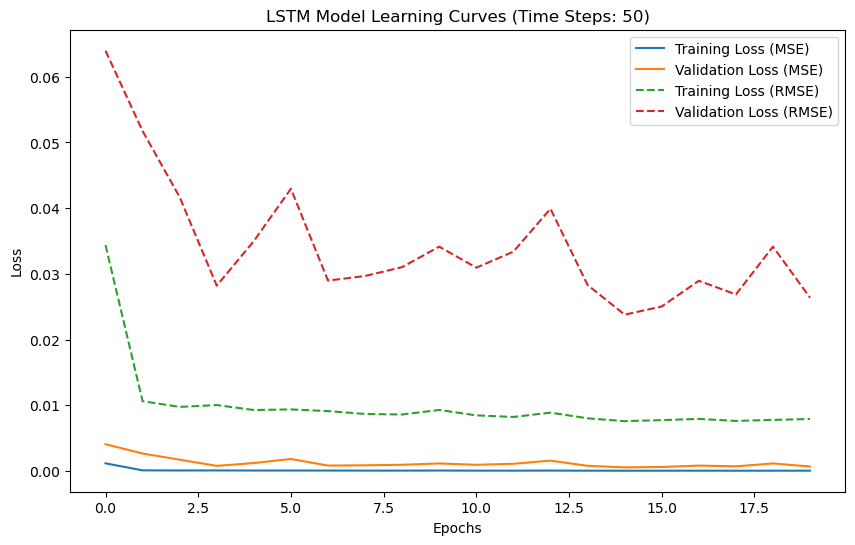

In [17]:
# Time Step: 50
time_steps = 50
print(f"\nTraining LSTM model for time steps: {time_steps}")

# Get the data splits for the current time step
X_train = data_splits[time_steps]["X_train"]
y_train = data_splits[time_steps]["y_train"]
X_validation = data_splits[time_steps]["X_validation"]
y_validation = data_splits[time_steps]["y_validation"]
X_test = data_splits[time_steps]["X_test"]
y_test = data_splits[time_steps]["y_test"]

# Define the LSTM Model
lstm_model_50 = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(50, activation='relu'),
    Dense(y_train.shape[1])  # Output layer
])

# Compile the Model
lstm_model_50.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the Model
history_50 = lstm_model_50.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate the Model
test_loss_50, test_mse_50 = lstm_model_50.evaluate(X_test, y_test, verbose=1)
test_rmse_50 = test_mse_50 ** 0.5
print(f"\nTime Steps {time_steps} - LSTM Model Performance:")
print(f"Mean Squared Error (MSE): {test_mse_50:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse_50:.4f}")

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(history_50.history['loss'], label='Training Loss (MSE)')
plt.plot(history_50.history['val_loss'], label='Validation Loss (MSE)')
plt.plot([loss ** 0.5 for loss in history_50.history['loss']], linestyle='--', label='Training Loss (RMSE)')
plt.plot([val_loss ** 0.5 for val_loss in history_50.history['val_loss']], linestyle='--', label='Validation Loss (RMSE)')
plt.title(f"LSTM Model Learning Curves (Time Steps: {time_steps})")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



Training LSTM model for time steps: 20
Epoch 1/20
137/137 [==============================] - 4s 11ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2/20
137/137 [==============================] - 1s 8ms/step - loss: 1.3487e-04 - mse: 1.3487e-04 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 3/20
137/137 [==============================] - 1s 8ms/step - loss: 1.2642e-04 - mse: 1.2642e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4/20
137/137 [==============================] - 1s 8ms/step - loss: 1.1905e-04 - mse: 1.1905e-04 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 5/20
137/137 [==============================] - 1s 8ms/step - loss: 1.0721e-04 - mse: 1.0721e-04 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 6/20
137/137 [==============================] - 2s 11ms/step - loss: 9.6251e-05 - mse: 9.6251e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 7/20
137/137 [==============================] - 1s 10ms/step - loss: 8.8663e-05 - mse: 8.8663e-05 - val_loss: 0.0019 - v

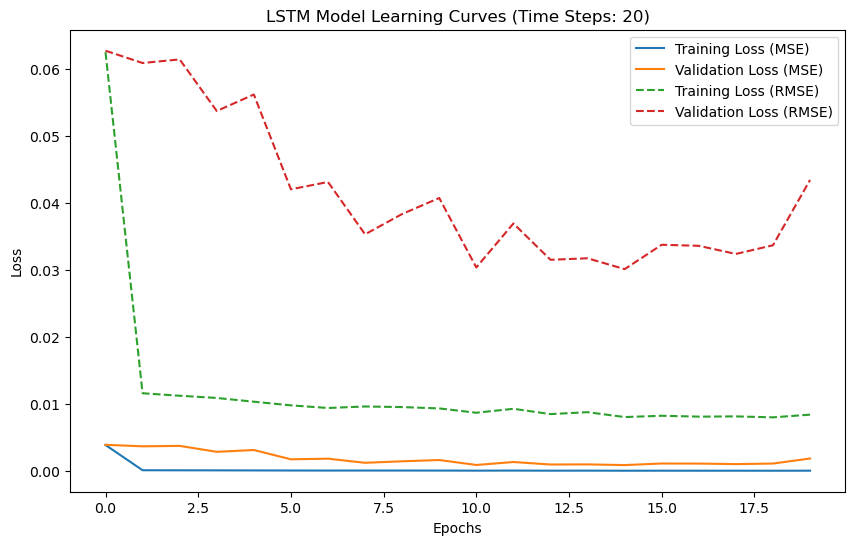

In [19]:
# Time Step: 20
time_steps = 20
print(f"\nTraining LSTM model for time steps: {time_steps}")

# Get the data splits for the current time step
X_train = data_splits[time_steps]["X_train"]
y_train = data_splits[time_steps]["y_train"]
X_validation = data_splits[time_steps]["X_validation"]
y_validation = data_splits[time_steps]["y_validation"]
X_test = data_splits[time_steps]["X_test"]
y_test = data_splits[time_steps]["y_test"]

# Define the LSTM Model
lstm_model_20 = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(50, activation='relu'),
    Dense(y_train.shape[1])  # Output layer
])

# Compile the Model
lstm_model_20.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the Model
history_20 = lstm_model_20.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate the Model
test_loss_20, test_mse_20 = lstm_model_20.evaluate(X_test, y_test, verbose=1)
test_rmse_20 = test_mse_20 ** 0.5
print(f"\nTime Steps {time_steps} - LSTM Model Performance:")
print(f"Mean Squared Error (MSE): {test_mse_20:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse_20:.4f}")

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(history_20.history['loss'], label='Training Loss (MSE)')
plt.plot(history_20.history['val_loss'], label='Validation Loss (MSE)')
plt.plot([loss ** 0.5 for loss in history_20.history['loss']], linestyle='--', label='Training Loss (RMSE)')
plt.plot([val_loss ** 0.5 for val_loss in history_20.history['val_loss']], linestyle='--', label='Validation Loss (RMSE)')
plt.title(f"LSTM Model Learning Curves (Time Steps: {time_steps})")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
# Compare scaled values
comparison_scaled = np.hstack((y_test[:5], y_pred_scaled[:5]))  # First 5 examples for simplicity
comparison_scaled_df = pd.DataFrame(
    comparison_scaled,
    columns=[f"Actual Value {i+1} (scaled)" for i in range(y_test.shape[1])] +
            [f"Predicted Value {i+1} (scaled)" for i in range(y_pred_scaled.shape[1])]
)

# Print the scaled comparison
print("\nComparison of Scaled Values:")
print(comparison_scaled_df)

# Compare unscaled values
comparison_unscaled = np.hstack((y_test_unscaled[:5], y_pred_unscaled[:5]))  # First 5 examples
comparison_unscaled_df = pd.DataFrame(
    comparison_unscaled,
    columns=[f"Actual Value {i+1} (unscaled)" for i in range(y_test_unscaled.shape[1])] +
            [f"Predicted Value {i+1} (unscaled)" for i in range(y_pred_unscaled.shape[1])]
)

# Print the unscaled comparison
print("\nComparison of Unscaled Values:")
print(comparison_unscaled_df)






Comparison of Scaled Values:
   Actual Value 1 (scaled)  Actual Value 2 (scaled)  \
0                 0.809653                 0.732272   
1                 0.805277                 0.739177   
2                 0.805405                 0.739276   
3                 0.800129                 0.735186   
4                 0.808494                 0.741671   

   Predicted Value 1 (scaled)  Predicted Value 2 (scaled)  
0                    0.810843                    0.613221  
1                    0.809969                    0.612815  
2                    0.806131                    0.613029  
3                    0.809173                    0.616061  
4                    0.810536                    0.615963  

Comparison of Unscaled Values:
   Actual Value 1 (unscaled)  Actual Value 2 (unscaled)  \
0                  78.660004                  66.361572   
1                  78.320000                  66.953140   
2                  78.330002                  66.961693   
3          


Fine-tuning LSTM model for time steps: 30
Phase 1: Training with learning rate 0.0001
Phase 2: Training with learning rate 1e-05


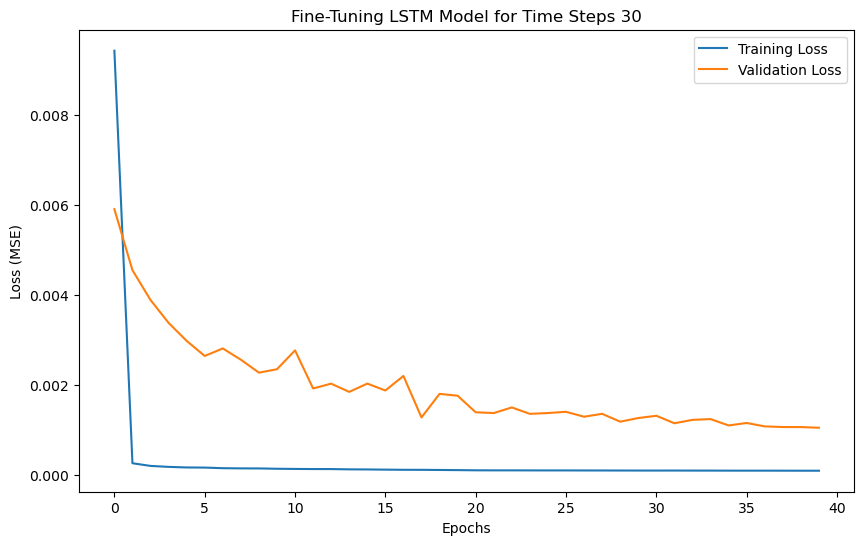

30/30 [==============================] - 0s 5ms/step - loss: 0.0010 - mse: 0.0010    

Time Steps: 30
Val Loss (MSE): 0.0010
Val RMSE: 0.0323

Fine-tuning LSTM model for time steps: 50
Phase 1: Training with learning rate 0.0001
Phase 2: Training with learning rate 1e-05


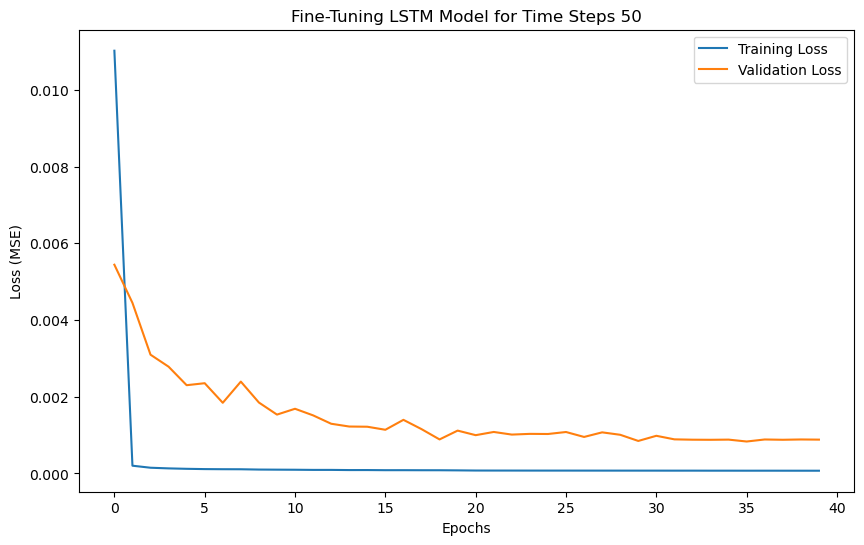

30/30 [==============================] - 0s 8ms/step - loss: 8.8188e-04 - mse: 8.8188e-04

Time Steps: 50
Val Loss (MSE): 0.0009
Val RMSE: 0.0297

Fine-tuning LSTM model for time steps: 20
Phase 1: Training with learning rate 0.0001
Phase 2: Training with learning rate 1e-05


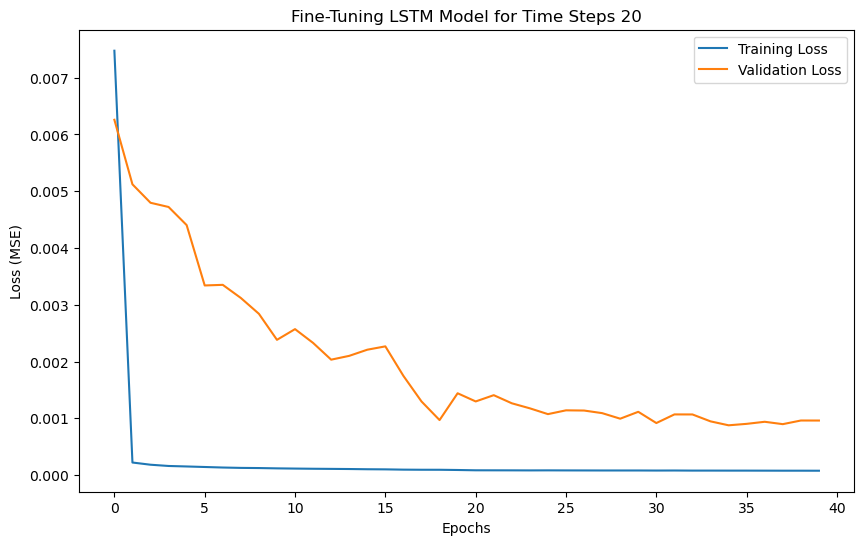

30/30 [==============================] - 0s 5ms/step - loss: 9.6171e-04 - mse: 9.6171e-04

Time Steps: 20
Val Loss (MSE): 0.0010
Val RMSE: 0.0310


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define hyperparameters
learning_rates = [0.0001, 0.00001]  # Learning rates for each phase
epochs_per_phase = 20  # Number of epochs for each phase
batch_size = 32

# Dictionary to store histories for each time step
fine_tuned_histories = {}

# Loop through each time step
for time_steps in time_steps_list:
    print(f"\nFine-tuning LSTM model for time steps: {time_steps}")
    
    # Get the data splits for the current time step
    X_train = data_splits[time_steps]["X_train"]
    y_train = data_splits[time_steps]["y_train"]
    X_validation = data_splits[time_steps]["X_validation"]
    y_validation = data_splits[time_steps]["y_validation"]
    X_test = data_splits[time_steps]["X_test"]
    y_test = data_splits[time_steps]["y_test"]

    # Define the LSTM model for the current time step
    lstm_model = Sequential([
        LSTM(64, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(32, activation='relu'),
        Dense(y_train.shape[1])  # Adjust output shape
    ])

    # Combined history for all phases
    combined_history = {'loss': [], 'val_loss': []}

    # Fine-tuning in phases with reduced learning rates
    for phase, lr in enumerate(learning_rates, start=1):
        print(f"Phase {phase}: Training with learning rate {lr}")
        
        # Compile the model with the current learning rate
        optimizer = Adam(learning_rate=lr)
        lstm_model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

        # Train the model
        history = lstm_model.fit(
            X_train, y_train,
            validation_data=(X_validation, y_validation),
            epochs=epochs_per_phase,
            batch_size=batch_size,
            verbose=0
        )

        # Append phase history to combined history
        combined_history['loss'] += history.history['loss']
        combined_history['val_loss'] += history.history['val_loss']

    # Save the combined history for the current time step
    fine_tuned_histories[time_steps] = combined_history

    # Plot learning curve for the current time step
    plt.figure(figsize=(10, 6))
    plt.plot(combined_history['loss'], label='Training Loss')
    plt.plot(combined_history['val_loss'], label='Validation Loss')
    plt.title(f'Fine-Tuning LSTM Model for Time Steps {time_steps}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.show()

    # Evaluate the fine-tuned model on the test set
    val_loss, val_mse = lstm_model.evaluate(X_validation, y_validation, verbose=1)
    validation_rmse = val_mse ** 0.5
    print(f"\nTime Steps: {time_steps}")
    print(f"Val Loss (MSE): {val_mse:.4f}")
    print(f"Val RMSE: {validation_rmse:.4f}")


30/30 [==============================] - 1s 6ms/step
Validation RMSE: 0.0310
Validation MSE: 0.0010
30/30 [==============================] - 0s 7ms/step
Test RMSE: 0.0948
Test MSE: 0.0090


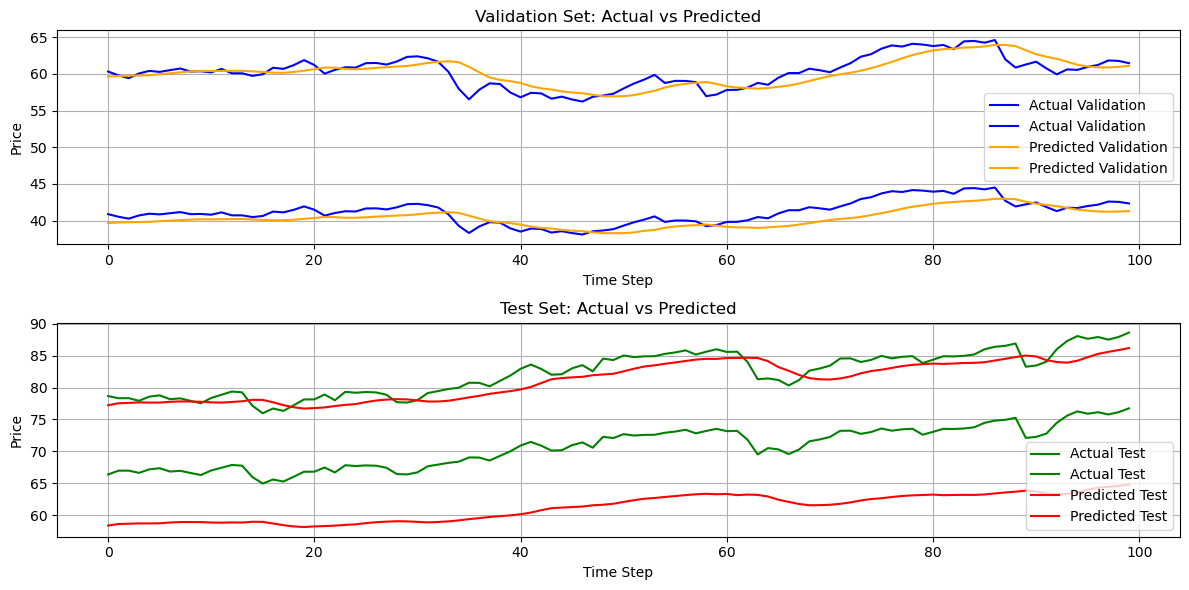

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the LSTM model on the validation set
validation_predictions = lstm_model.predict(X_validation)
validation_rmse = np.sqrt(mean_squared_error(y_validation, validation_predictions))
validation_mse = mean_squared_error(y_validation, validation_predictions)

print(f"Validation RMSE: {validation_rmse:.4f}")
print(f"Validation MSE: {validation_mse:.4f}")

# Evaluate the LSTM model on the test set
test_predictions = lstm_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

# Rescale predictions and actual values for better interpretability
y_validation_rescaled = target_scaler.inverse_transform(y_validation)
validation_predictions_rescaled = target_scaler.inverse_transform(validation_predictions)
y_test_rescaled = target_scaler.inverse_transform(y_test)
test_predictions_rescaled = target_scaler.inverse_transform(test_predictions)

# Plot the validation set: actual vs. predicted values
plt.figure(figsize=(12, 6))

# Plot for validation set
plt.subplot(2, 1, 1)
plt.plot(y_validation_rescaled[:100], label='Actual Validation', color='blue')
plt.plot(validation_predictions_rescaled[:100], label='Predicted Validation', color='orange')
plt.title('Validation Set: Actual vs Predicted')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Plot the test set: actual vs. predicted values
plt.subplot(2, 1, 2)
plt.plot(y_test_rescaled[:100], label='Actual Test', color='green')
plt.plot(test_predictions_rescaled[:100], label='Predicted Test', color='red')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
